In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
#Loading the Placement_Data_Full_Class.csv file into python
placement_data = pd.read_csv("Placement_Data_Full_Class.csv")
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
#num of rows and columns
placement_data.shape

(215, 15)

In [4]:
placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
placement_data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

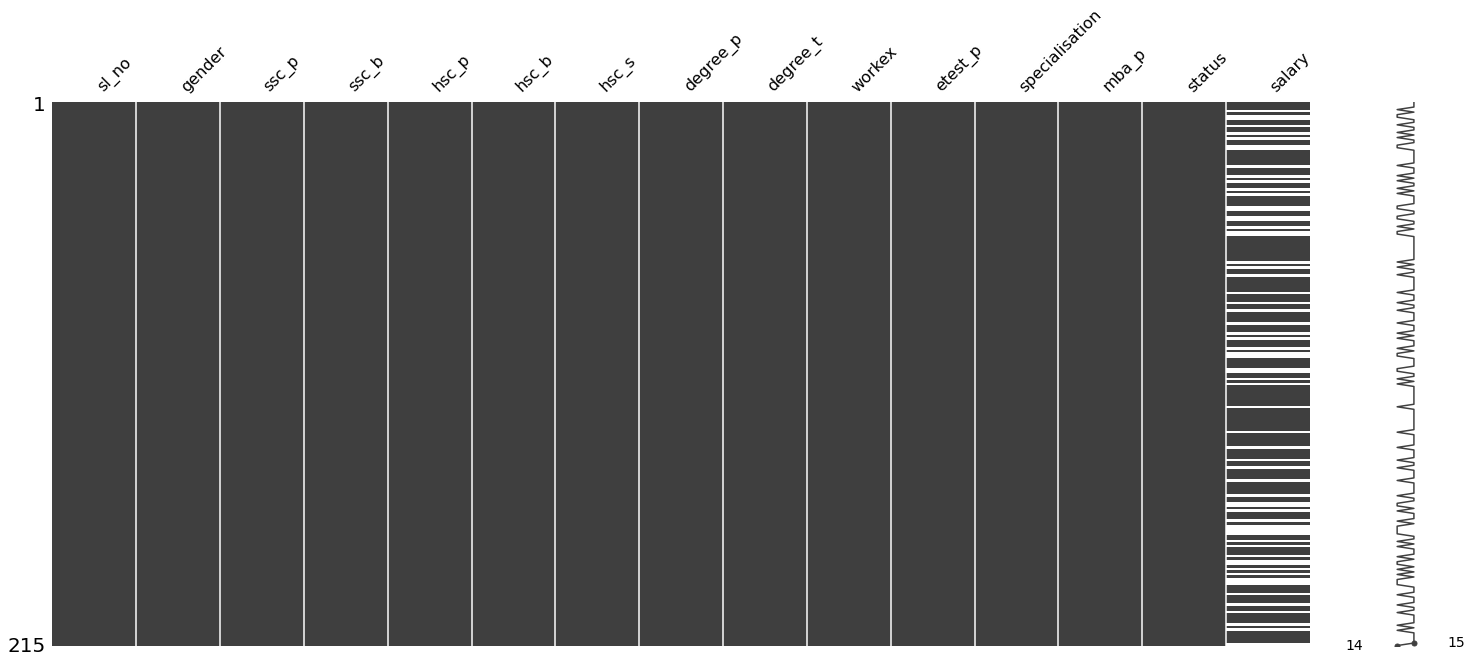

In [6]:
import missingno as msno
msno.matrix(placement_data)

In [7]:
placement_data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
placement_data['salary'].fillna(value=0, inplace=True)
placement_data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
placement_data.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability percentage')

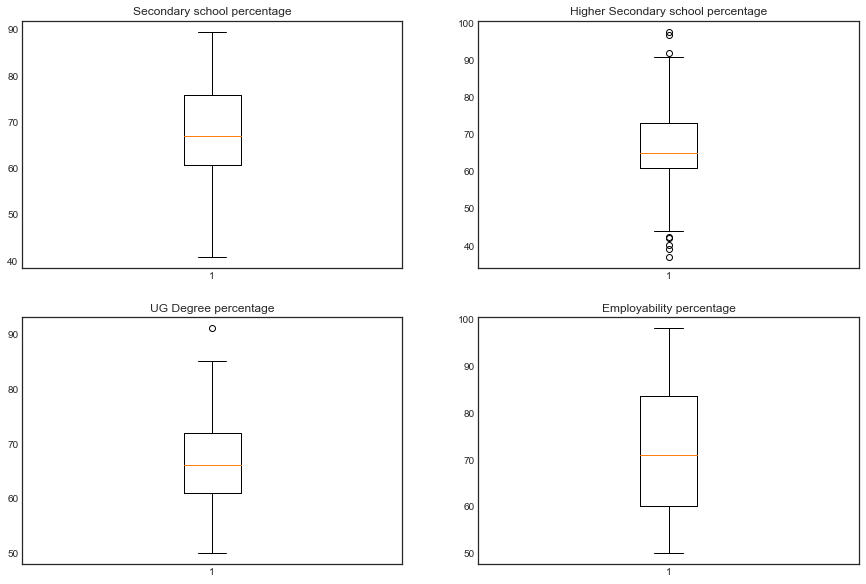

In [10]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_data['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_data['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_data['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_data['etest_p'])
ax.set_title('Employability percentage')

{'whiskers': [<matplotlib.lines.Line2D at 0x2934307fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2934308e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2934307f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2934308eac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2934308ed60>],
 'means': []}

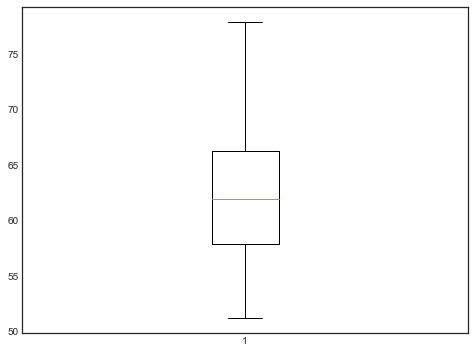

In [11]:
plt.figure(figsize = (8, 6))
plt.style.use('seaborn-white')
plt.boxplot(placement_data['mba_p'])

In [12]:
Q1 = placement_data['hsc_p'].quantile(0.25)
Q3 = placement_data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_data['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_data['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_data.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

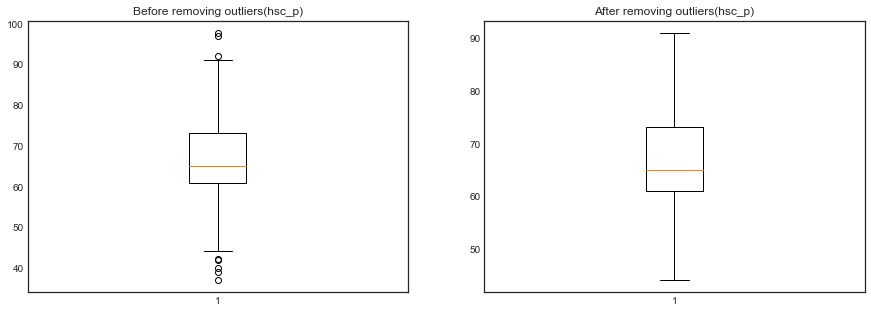

In [13]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_data['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

In [14]:
placement_filtered.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


In [15]:
placement_filtered.shape

(207, 12)

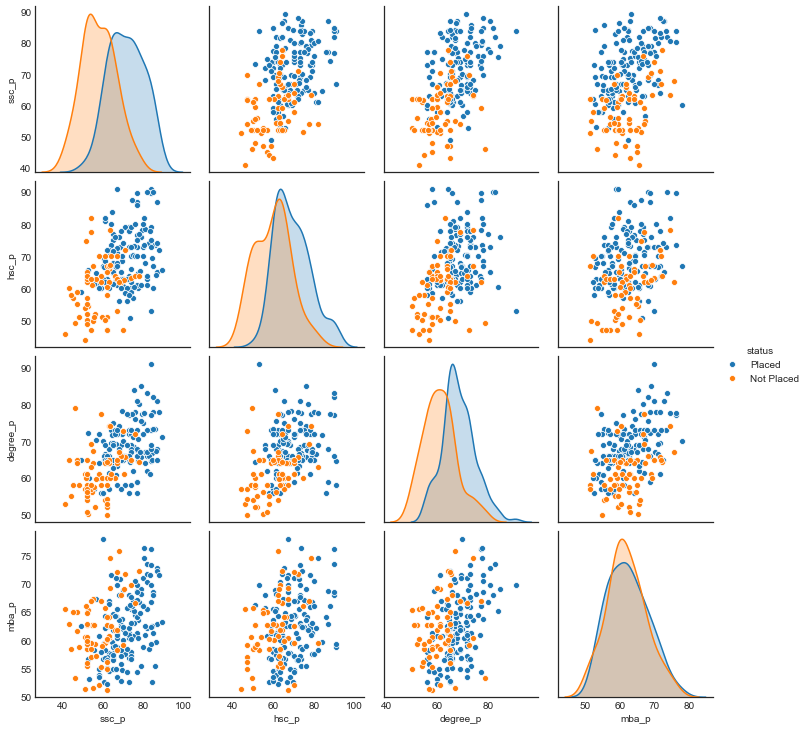

In [16]:
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p'],hue="status")

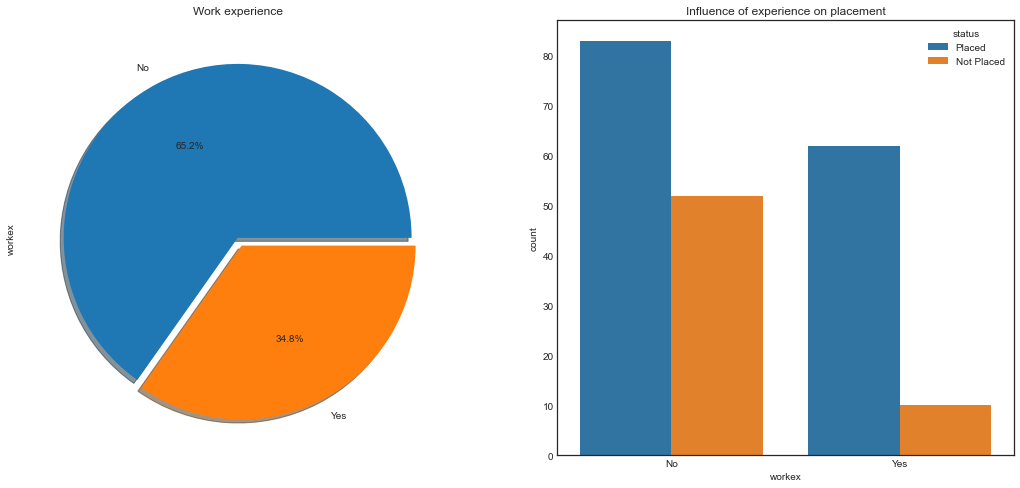

In [17]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0,0.0


In [19]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head(10)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.00,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.50,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.00,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.00,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.80,0,55.50,1,0,1,0,1,0,0
5,1,55.00,49.80,67.25,1,55.00,0,51.58,0,0,0,1,0,0,1
6,0,46.00,49.20,79.00,0,74.28,0,53.29,0,0,1,0,1,0,0
7,1,82.00,64.00,66.00,1,67.00,0,62.14,1,0,0,1,0,0,1
8,1,73.00,79.00,72.00,0,91.34,0,61.29,1,0,1,0,1,0,0
9,1,58.00,70.00,61.00,0,54.00,0,52.21,0,0,1,0,1,0,0


In [20]:
feature_cols=['gender','ssc_p','hsc_p','degree_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

In [21]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [35]:
X.ssc_p

0      67.00
1      79.33
2      65.00
3      56.00
4      85.80
       ...  
210    80.60
211    58.00
212    67.00
213    74.00
214    62.00
Name: ssc_p, Length: 207, dtype: float64

In [36]:
X['ssc_p']

0      67.00
1      79.33
2      65.00
3      56.00
4      85.80
       ...  
210    80.60
211    58.00
212    67.00
213    74.00
214    62.00
Name: ssc_p, Length: 207, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


In [45]:
X.shape

(207, 14)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  6]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.81      0.96      0.88        27

    accuracy                           0.83        42
   macro avg       0.86      0.78      0.80        42
weighted avg       0.84      0.83      0.82        42



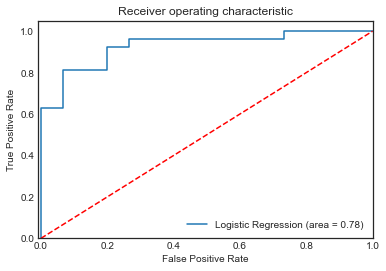

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


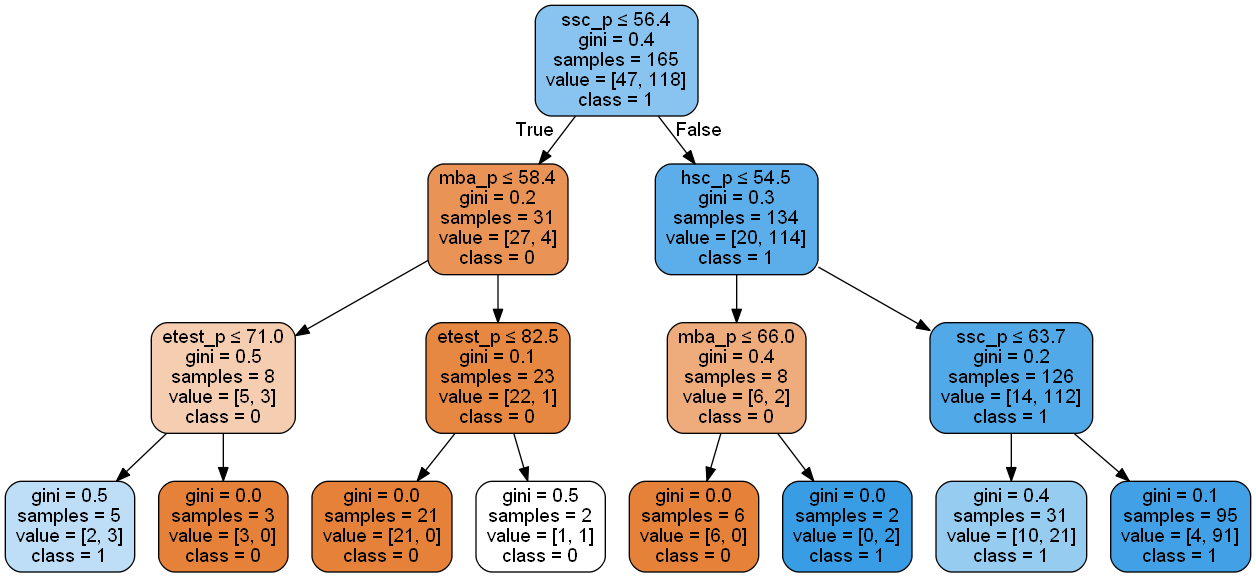

In [52]:
from six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'], precision=1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

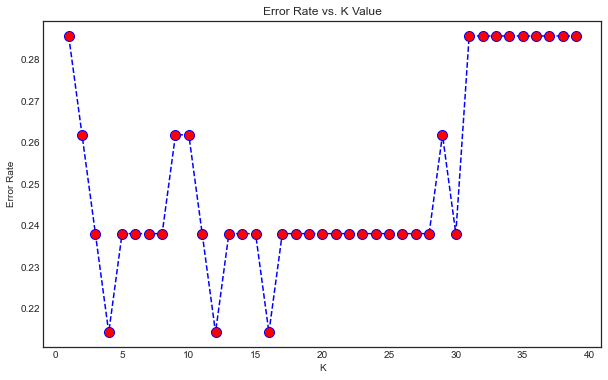

In [54]:
#error rate vs k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6  9]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.74      0.96      0.84        27

    accuracy                           0.76        42
   macro avg       0.80      0.68      0.69        42
weighted avg       0.78      0.76      0.73        42

